Differential Privacy on a synthetic dataset

In [1]:
!pip install diffprivlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.5/176.5 kB 4.0 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator.

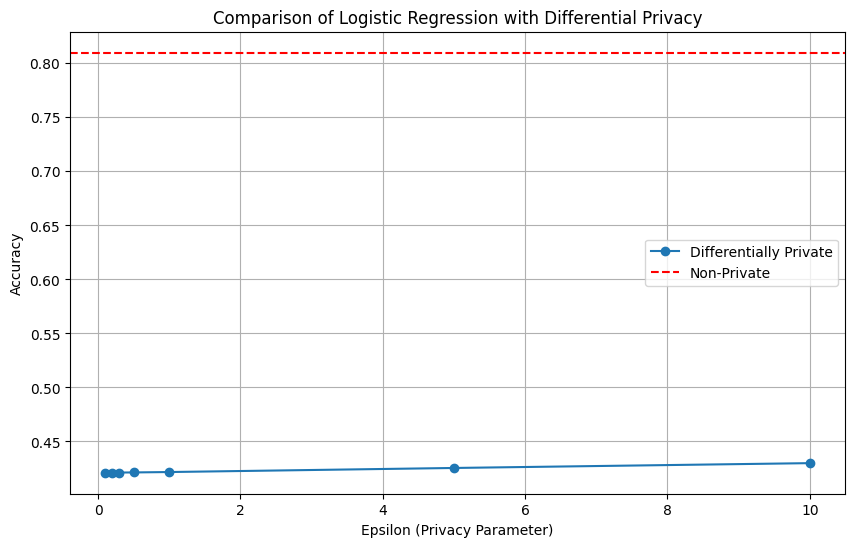

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from diffprivlib.models import LogisticRegression as DPLogisticRegression

# Generate synthetic dataset
def generate_data():
    X, y = make_classification(
        n_samples=100000, n_features=20, n_informative=15, n_redundant=5, random_state=42
    )
    return train_test_split(X, y, test_size=0.3, random_state=42)

# Train non-private logistic regression
def train_non_private_logreg(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    return accuracy

# Train differentially private logistic regression
def train_private_logreg(X_train, y_train, X_test, y_test, epsilon):
    model = DPLogisticRegression(epsilon=epsilon, data_norm=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    return accuracy

# Main function for comparison
def compare_privacy_measures():
    X_train, X_test, y_train, y_test = generate_data()

    # Non-private logistic regression
    non_private_accuracy = train_non_private_logreg(X_train, y_train, X_test, y_test)

    # Differentially private logistic regression with varying epsilon
    epsilons = [0.1, 0.2,0.3, 0.5, 1, 5, 10]
    dp_accuracies = []

    for epsilon in epsilons:
        accuracy = train_private_logreg(X_train, y_train, X_test, y_test, epsilon)
        dp_accuracies.append(accuracy)

    # Visualize results
    plt.figure(figsize=(10, 6))
    plt.plot(epsilons, dp_accuracies, label="Differentially Private", marker="o")
    plt.axhline(y=non_private_accuracy, color="r", linestyle="--", label="Non-Private")
    plt.title("Comparison of Logistic Regression with Differential Privacy")
    plt.xlabel("Epsilon (Privacy Parameter)")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    compare_privacy_measures()